<a href="https://colab.research.google.com/github/sgzh1/Data-Analysis/blob/main/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для анализа взяты данные о качестве вина

**1. Сбор и подготовка данных**

In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Загрузка данных из открытого источника
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Осмотр данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# Проверка пропусков и замена их медианными значениями
data.fillna(data.median(), inplace=True)

In [13]:
# Вычисление первого квартиля (Q1) и третьего квартиля (Q3)
Q1 = data.quantile(0.25)  # Q1: 25-й процентиль
Q3 = data.quantile(0.75)  # Q3: 75-й процентиль

# Вычисление межквартильного размаха (IQR)
IQR = Q3 - Q1  # IQR: разница между Q3 и Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

# Фильтрация данных для удаления выбросов
# Условие оставляет только те строки, в которых все значения находятся в пределах границ
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [14]:
# Нормализация данных (масштабирование)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

**2. Анализ данных**

In [15]:
# Вычисление мер центральной тенденции
mean_values = data_scaled.mean()
median_values = data_scaled.median()
std_values = data_scaled.std()

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Standard Deviation values:\n", std_values)

Mean values:
 fixed acidity          -5.062391e-16
volatile acidity       -5.002124e-16
citric acid             1.205331e-17
residual sugar         -3.374927e-16
chlorides               4.339192e-16
free sulfur dioxide     3.013328e-17
total sulfur dioxide   -1.084798e-16
density                -1.359614e-14
pH                     -1.392158e-15
sulphates               3.495460e-16
alcohol                -2.410662e-16
quality                -5.062391e-16
dtype: float64
Median values:
 fixed acidity          -0.248346
volatile acidity       -0.018678
citric acid            -0.037688
residual sugar         -0.193771
chlorides              -0.040954
free sulfur dioxide    -0.229868
total sulfur dioxide   -0.240197
density                 0.010198
pH                      0.040839
sulphates              -0.183231
alcohol                -0.260280
quality                 0.522359
dtype: float64
Standard Deviation values:
 fixed acidity           1.000424
volatile acidity        1.000424
citric

Результаты показывают, что после нормализации средние значения всех признаков близки к нулю, а стандартные отклонения равны примерно 1. Это подтверждает, что данные были успешно масштабированы с использованием StandardScaler. Медианные значения указывают на наличие небольшой асимметрии в распределении данных, что важно учитывать при дальнейших анализах.

In [16]:
# Группировка данных по качеству вина
quality_groups = data.groupby('quality').mean()
print(quality_groups)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
4             8.036364          0.671818     0.167576        2.130303   
5             8.023782          0.566930     0.220799        2.192885   
6             8.189558          0.500341     0.251044        2.175000   
7             8.616296          0.403852     0.348963        2.208889   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
4         0.080182             9.939394             31.909091  0.996846   
5         0.081374            15.280702             49.276803  0.996905   
6         0.077187            15.548193             38.945783  0.996456   
7         0.072763            13.325926             30.422222  0.995772   

               pH  sulphates    alcohol  
quality                                  
4        3.366667   0.5415

Данные показывают, что с ростом качества вина наблюдаются следующие тенденции:
- Летучая кислотность, хлориды, свободный и общий диоксид серы, а также плотность уменьшаются.
- Лимонная кислота, сульфаты и содержание алкоголя увеличиваются.
- Остаточный сахар и pH не показывают явной зависимости от качества вина.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.271010     0.659397   
volatile acidity          -0.271010          1.000000    -0.627194   
citric acid                0.659397         -0.627194     1.000000   
residual sugar             0.229653          0.035215     0.149494   
chlorides                  0.197774          0.117805     0.073031   
free sulfur dioxide       -0.150845         -0.016718    -0.068852   
total sulfur dioxide      -0.087083          0.097487     0.004660   
density                    0.610125          0.044174     0.305458   
pH                        -0.684378          0.220702    -0.470286   
sulphates                  0.165367         -0.317346     0.256747   
alcohol                   -0.037999         -0.220600     0.137762   
quality                    0.113422         -0.346962     0.212133   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

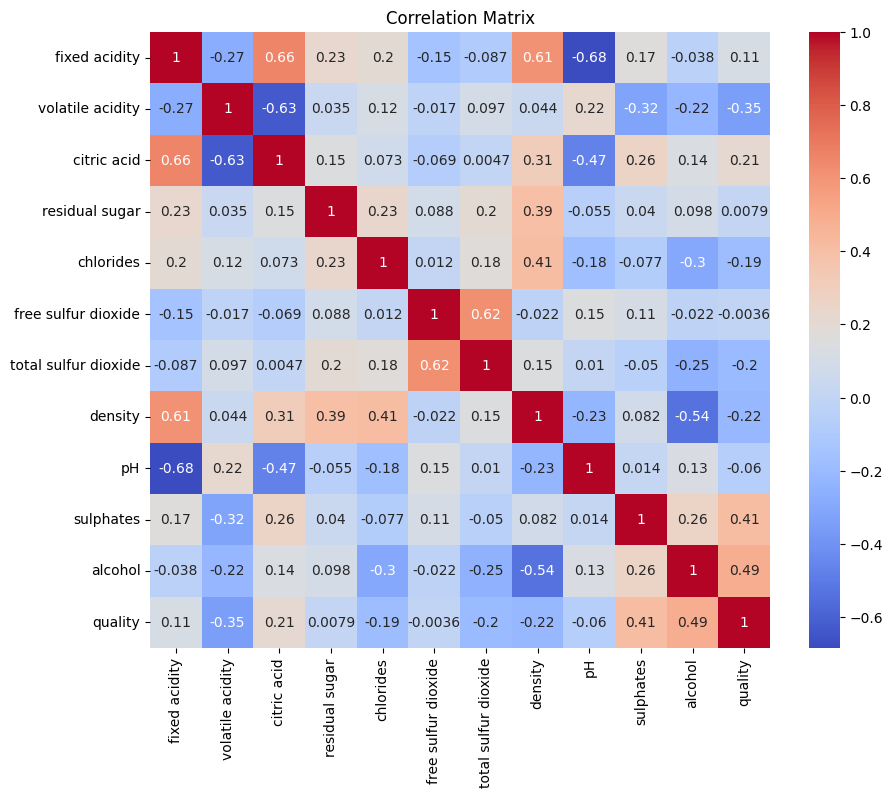

In [17]:
# Подсчет корреляций
correlation_matrix = data.corr()
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Корреляционная матрица показывает, что наиболее значимыми факторами, влияющими на качество вина, являются:
- Положительная корреляция с алкоголем (0.492551) и сульфатами (0.413533), что указывает на их положительное влияние на качество вина.
- Отрицательная корреляция с летучей кислотностью (-0.346962), хлоридами (-0.190869), общим диоксидом серы (-0.203374) и плотностью (-0.215375), что указывает на их негативное влияние на качество вина.

Также стоит отметить значительную положительную корреляцию между фиксированной кислотностью и лимонной кислотой (0.659397), а также между фиксированной кислотностью и плотностью (0.610125).

Сильная положительная корреляция между свободным и общим диоксидом серы (0.619675) указывает на их взаимосвязь в процессе производства вина.

In [23]:
# Линейная регрессия для предсказания качества вина
X = data_scaled.drop('quality', axis=1)
y = data_scaled['quality']

reg = LinearRegression()
reg.fit(X, y)

# Коэффициенты регрессии
coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
fixed acidity            0.049001
volatile acidity        -0.184873
citric acid             -0.079554
residual sugar           0.001616
chlorides               -0.030308
free sulfur dioxide      0.049602
total sulfur dioxide    -0.099902
density                 -0.036611
pH                      -0.091967
sulphates                0.266355
alcohol                  0.354405


Эти коэффициенты регрессии представляют собой веса, или влияние, каждого признака на качество вина, когда все остальные признаки фиксированы. Вот как можно интерпретировать эти коэффициенты:

1. **Положительные и отрицательные коэффициенты**:
   - Положительные коэффициенты (например, `alcohol`, `sulphates`, `fixed acidity`) указывают на то, что увеличение этих признаков связано с повышением оценки качества вина.
   - Отрицательные коэффициенты (например, `volatile acidity`, `total sulfur dioxide`, `pH`) указывают на то, что увеличение этих признаков может быть связано с понижением оценки качества вина.

2. **Относительная важность признаков**:
   - Коэффициенты также отражают относительную важность каждого признака в модели. Например, `alcohol` и `sulphates` имеют наибольшие положительные коэффициенты, что может означать, что содержание алкоголя и сульфатов положительно влияет на качество вина по данной модели.

3. **Особенности влияния признаков**:
   - Например, `volatile acidity` имеет отрицательный коэффициент, что может указывать на то, что повышенное содержание летучей кислоты может негативно влиять на оценку качества вина.

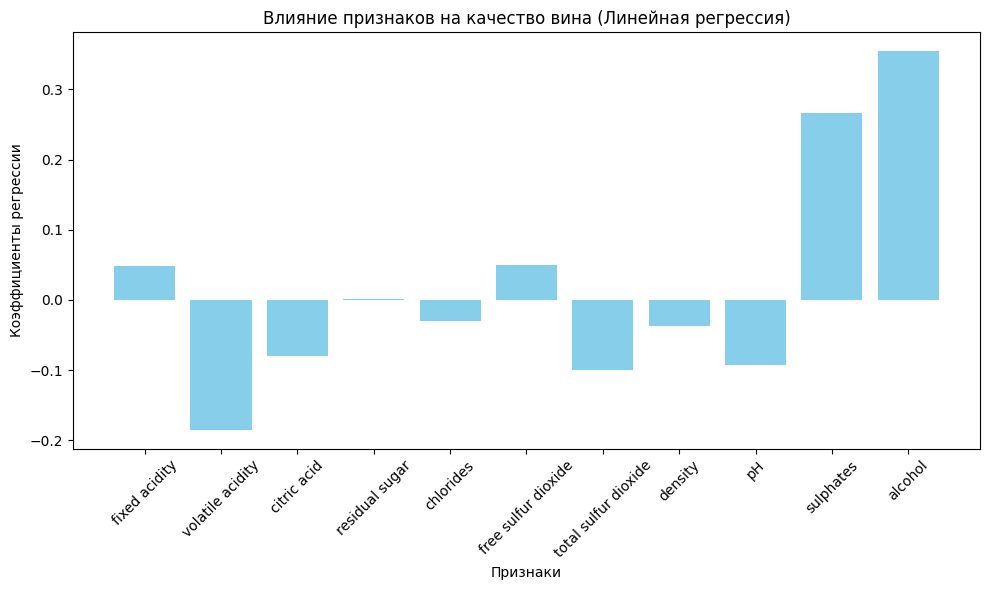

In [25]:
# Визуализация линейной регрессии
import matplotlib.pyplot as plt

# Создание фигуры и осей графика
plt.figure(figsize=(10, 6))
plt.bar(coefficients.index, coefficients['Coefficient'], color='skyblue')

# Добавление заголовка и меток к осям
plt.title('Влияние признаков на качество вина (Линейная регрессия)')
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты регрессии')

# Поворот подписей по оси x для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()